<a href="https://colab.research.google.com/github/srosamont/Projects_Ironhack/blob/master/Mdelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

In [18]:
from sklearn.manifold import TSNE
# for visualizaion of data with high number of dimension

In [ ]:
#df.to_csv('NYC_taxi_clean.csv')
df=pd.read_csv('NYC_taxi_clean.csv')

In [ ]:
to_select=['vendor_id','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','month', 'week_nb', 'weekday', 'day_nb',
       'hour', 'new_passenger_count', 'precipitation_mm',
       'snow_fall_mm', 'snow_depth_mm', 'average temperature_C',
       'ride_duration_seconds', 'distance_KM', 'working_days']

In [4]:
df_ml2=df[['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','month',
       'hour', 'new_passenger_count', 'precipitation_mm','weekday',
       'snow_fall_mm', 'snow_depth_mm', 'average temperature_C','working_days','Month_day']]



NameError: ignored

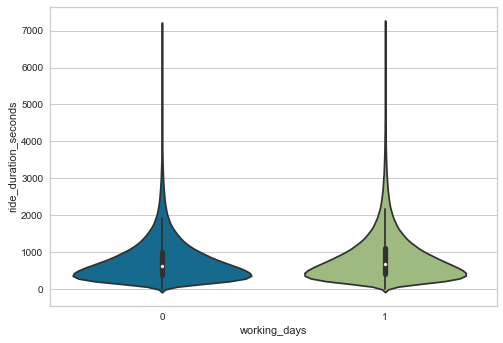

<AxesSubplot:xlabel='weekday', ylabel='ride_duration_seconds'>

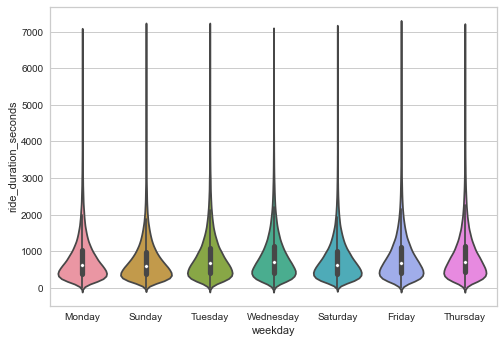

In [ ]:
sns.violinplot(x = df_ml2.working_days, y = df.ride_duration_seconds, data = df_ml2)
plt.show()
sns.violinplot(x = df_ml2.weekday, y = df.ride_duration_seconds, data = df_ml2)

In [ ]:
df_ml3=df[['vendor_id','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','month',
       'hour', 'new_passenger_count', 'precipitation_mm','weekday',
       'snow_fall_mm', 'snow_depth_mm', 'average temperature_C','working_days','Month_day','distance_KM']]

In [ ]:
df_ml2=pd.get_dummies(data=df_ml2, columns=['hour','month','weekday'],drop_first=True)

In [ ]:
#Normalization of data with MinMaxscaler (not standardization since not sure the distribution is normal)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df_ml2)

In [ ]:
X=df_ml3.drop(['hour','new_passenger_count','distance_KM','weekday'],axis=1)

In [ ]:
X.head()

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,month,precipitation_mm,snow_fall_mm,snow_depth_mm,average temperature_C,working_days,Month_day
0,2,-73.982155,40.767937,-73.964630,40.765602,March,7.366,0.0,0.000000,7.500000,1,14
1,1,-73.980415,40.738564,-73.999481,40.731152,June,8.890,0.0,0.000000,5.277778,0,12
2,2,-73.979027,40.763939,-74.005333,40.710087,January,0.000,0.0,0.000254,-5.555556,1,19
3,2,-74.010040,40.719971,-74.012268,40.706718,April,10.160,0.0,0.000000,23.611111,1,6
4,2,-73.973053,40.793209,-73.972923,40.782520,March,0.000,0.0,0.000000,8.055556,0,26


In [ ]:
X=pd.get_dummies(data=X, columns=['month'],drop_first=True)

In [ ]:
#Normalization of data with MinMaxscaler (not standardization since not sure the distribution is normal)
# define min max scaler
scaler1 = MinMaxScaler()
# transform data
scaled1 = scaler1.fit_transform(X)

'hour''new_passenger_count''distance_KM','weekday'

###  Find  optimum number of cluster with K-Elbow method

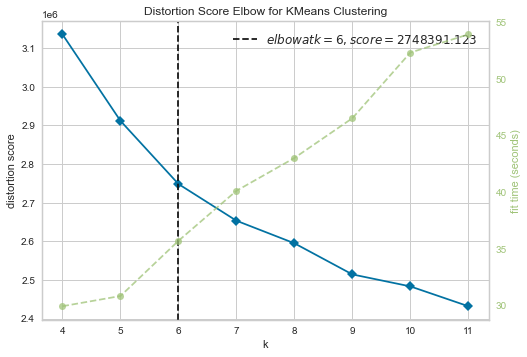

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

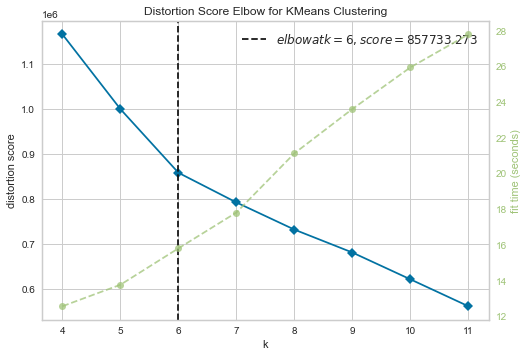

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:

# Instantiate the clustering model and visualizer
model1 = KMeans()
visualizer = KElbowVisualizer(model1, k=(4,12))

visualizer.fit(scaled1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# PCA

In [ ]:
#Apply PCA before Kmean ( should optimize  the output (empirical observations) )

In [ ]:
# define PCA toget 85% of explained variance, fit the PCA model and check the number of components; Here 23
pca=PCA(0.85)
pca.fit(scaled)
pca.explained_variance_ratio_

array([0.12435527, 0.06447294, 0.06270994, 0.06074972, 0.05870824,
       0.0535061 , 0.05144554, 0.05062883, 0.04745935, 0.03075604,
       0.02500185, 0.02248333, 0.02200923, 0.02091192, 0.02046397,
       0.01964513, 0.01883146, 0.01830376, 0.01784664, 0.01778813,
       0.01747446, 0.01715302, 0.01688044])

In [ ]:
#apply pCA transformation 
pca_df=pd.DataFrame(pca.transform(scaled), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23'])

In [ ]:
# define PCA toget 85% of explained variance, fit the PCA model and check the number of components; Here 23
pca1=PCA(0.85)
pca1.fit(scaled1)
pca1.explained_variance_ratio_

array([0.19230754, 0.15826853, 0.13730481, 0.13272672, 0.12776731,
       0.12488385])

In [ ]:
#apply pCA transformation 
pca_df1=pd.DataFrame(pca1.transform(scaled1), columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

# Calcul Y predict

In [ ]:
#model1 Kmeans applied to data transformed with PCA
kmeans1=KMeans(6)
kmeans1=kmeans1.fit(pca_df)
kmeans1.cluster_centers_
# Attribution of class to each record (prediction
df_ml2['cluster1']=kmeans1.predict(pca_df)

In [ ]:
df_ml2.cluster1.value_counts(normalize=True)

5    0.356053
3    0.151389
2    0.133886
4    0.129087
1    0.118353
0    0.111231
Name: cluster1, dtype: float64

In [ ]:
#df_ml2Sample=df_ml2.sample(frac=0.001)

In [ ]:
sns.scatterplot(x='PC1',y='PC2', data=pca_df, hue=df_ml2['cluster1'])

In [ ]:
# plot relationship between columns to see how they influence clusters
sns.scatterplot(df_ml2Sample.pickup_latitude ,df_ml2Sample.pickup_longitude  ,hue=df_ml2Sample.cluster1)

##### with class for insignificant columns

In [ ]:
#model1 Kmeans applied to data transformed with PCA
kmeans2=KMeans(6)
kmeans2=kmeans2.fit(pca_df1)
kmeans2.cluster_centers_
# Attribution of class to each record (prediction


array([[ 0.01596182, -0.11179023,  0.45375035,  0.07301792,  0.78035086,
         0.00342754],
       [-0.00921044,  0.04904424, -0.34698896, -0.53009057, -0.00861715,
        -0.64340057],
       [-0.00304311, -0.09862976, -0.43967985,  0.75159236, -0.0962295 ,
        -0.07169244],
       [ 0.53762093,  0.04752732,  0.31939329,  0.0034062 , -0.29771983,
        -0.00786078],
       [-0.01721006,  0.08552666, -0.32634589, -0.37640858, -0.0350047 ,
         0.76624007],
       [-0.46212534,  0.03380897,  0.33551209,  0.00866972, -0.29442158,
        -0.01212182]])

In [ ]:
df_ml3['cluster']=kmeans2.predict(pca_df1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_ml3.cluster.value_counts(normalize=True)

5    0.182208
2    0.175668
1    0.163400
3    0.160688
0    0.160582
4    0.157453
Name: cluster, dtype: float64

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

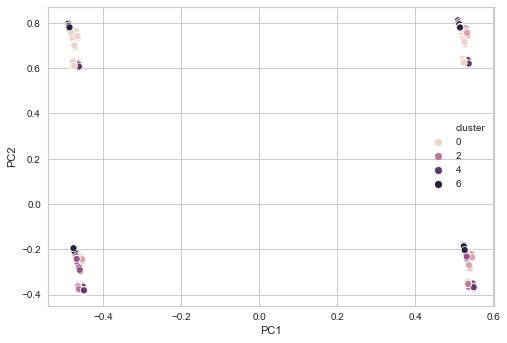

In [ ]:
sns.scatterplot(x='PC1',y='PC2', data=pca_df1, hue=df_ml3['cluster'])

In [ ]:
df_ml3.to_csv('df_ml3.csv')
df_ml2.to_csv('df_ml2.csv')

In [8]:
from google.colab import files
df_ml3=files.upload()

Saving df_ml3.csv to df_ml3.csv


In [12]:
df_ml3=pd.read_csv('df_ml3.csv')

In [16]:
pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /usr/local/lib/python3.6/dist-packages (0.0)


In [17]:
#model librairies
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.model_selection import RepeatedStratifiedKFold

#import statsmodels.api as sm
#from statsmodels.genmod.families.links import log
from sklearn.linear_model import TweedieRegressor


ImportError: ignored

In [ ]:
df_ml2.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'new_passenger_count', 'precipitation_mm',
       'snow_fall_mm', 'snow_depth_mm', 'average temperature_C',
       'working_days', 'Month_day', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'month_February', 'month_January', 'month_June', 'month_March',
       'month_May', 'cluster1'],
      dtype='object')

In [ ]:
df_ml3.columns

Index(['vendor_id', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'month', 'hour', 'new_passenger_count',
       'precipitation_mm', 'snow_fall_mm', 'snow_depth_mm',
       'average temperature_C', 'working_days', 'Month_day', 'distance_KM',
       'cluster'],
      dtype='object')

In [11]:
X=df_ml3.drop(['vendor_id', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'month',
       'precipitation_mm', 'snow_fall_mm', 'snow_depth_mm',
       'average temperature_C', 'working_days', 'Month_day'],axis=1)

AttributeError: ignored

In [ ]:
X.head()

,hour,new_passenger_count,distance_KM,cluster
0,17,1.0,1.498521,2
1,0,1.0,1.805507,4
2,11,1.0,6.385098,5
3,19,1.0,1.485498,3
4,13,1.0,1.188588,0


In [ ]:
X.shape

(1450443, 4)

In [ ]:
Y=df.ride_duration_seconds

In [ ]:
Y.shape

(1450443,)

In [ ]:
# splitting  dataset into train and test 1
X_train, X_test,y_train,y_test = train_test_split(scaled, \
                                                  df.ride_duration_seconds, \
                                                  test_size=1/3, \
                                                  random_state=42)

In [ ]:
# splitting  dataset into train and test 2
X1_train, X1_test,y1_train,y1_test = train_test_split(X, \
                                                  Y, \
                                                  test_size=1/3, \
                                                  random_state=42)



In [ ]:
X1_train

,hour,new_passenger_count,distance_KM,cluster
561192,8,2.0,0.948432,3
398074,11,1.0,0.929590,5
1290032,0,1.0,3.116450,0
671963,10,3.0,0.729924,4
845324,16,2.0,9.091177,0
...,...,...,...,...
259178,18,1.0,2.230714,5
1414414,20,2.0,3.025477,2
131932,20,1.0,3.473278,4
671155,8,1.0,1.653215,2


## MODELS

In [88]:
df_ml3Sample=df_ml3.sample(frac=0.1)

In [89]:
df_ml3Sample.shape

(145044, 18)

In [90]:
df_ml3Sample.head()

,Unnamed: 0,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,month,hour,new_passenger_count,precipitation_mm,weekday,snow_fall_mm,snow_depth_mm,average temperature_C,working_days,Month_day,distance_KM,cluster
1085705,1085705,1,-73.991219,40.749767,-73.982262,40.745838,June,8,1.0,0.254,Wednesday,0.0,0.000000,23.888889,1,29,0.871894,0
132593,132593,1,-73.969505,40.757793,-73.974098,40.750427,February,22,1.0,0.000,Tuesday,0.0,0.000254,6.666667,1,2,0.905849,1
444434,444434,1,-74.010155,40.709400,-73.997711,40.746349,January,19,1.0,0.000,Wednesday,0.0,0.000000,-3.333333,1,13,4.240252,4
1264457,1264457,2,-74.006531,40.741470,-73.984734,40.758492,March,17,1.0,0.000,Saturday,0.0,0.000000,8.055556,0,26,2.636967,2
750649,750649,2,-73.988930,40.736603,-73.978981,40.750221,March,9,1.0,0.000,Wednesday,0.0,0.000000,8.055556,1,30,1.730778,2


In [91]:
df_ml3Sample=pd.get_dummies(data=df_ml3Sample,columns=['month','weekday'],drop_first=True)

In [93]:
X_tsne=df_ml3Sample.drop(['cluster'],axis=1)

In [94]:
#Normalization of data with MinMaxscaler (not standardization since not sure the distribution is normal)
# define min max scaler
scaler4 = MinMaxScaler()
# transform data
X_tsne= scaler4.fit_transform(X_tsne)

In [95]:
tsne=TSNE(n_components=2,verbose=1,n_iter=1000)

In [96]:
tsne_results=tsne.fit_transform(X_tsne)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 145044 samples in 29.179s...
[t-SNE] Computed neighbors for 145044 samples in 626.737s...
[t-SNE] Computed conditional probabilities for sample 1000 / 145044
[t-SNE] Computed conditional probabilities for sample 2000 / 145044
[t-SNE] Computed conditional probabilities for sample 3000 / 145044
[t-SNE] Computed conditional probabilities for sample 4000 / 145044
[t-SNE] Computed conditional probabilities for sample 5000 / 145044
[t-SNE] Computed conditional probabilities for sample 6000 / 145044
[t-SNE] Computed conditional probabilities for sample 7000 / 145044
[t-SNE] Computed conditional probabilities for sample 8000 / 145044
[t-SNE] Computed conditional probabilities for sample 9000 / 145044
[t-SNE] Computed conditional probabilities for sample 10000 / 145044
[t-SNE] Computed conditional probabilities for sample 11000 / 145044
[t-SNE] Computed conditional probabilities for sample 12000 / 145044
[t-SNE] Computed conditional prob

In [97]:
tsne_results.shape

(145044, 2)

In [98]:
tsne_results

array([[-28.197346 ,  -6.8189178],
       [ 28.661743 , -31.035818 ],
       [ -0.8092288,  11.33363  ],
       ...,
       [-39.17361  ,  33.66582  ],
       [-14.550576 ,  21.199228 ],
       [ 44.984    ,  19.15265  ]], dtype=float32)

In [99]:
df_ml3Sample['tsne2D1']=tsne_results[:,0]

In [100]:
df_ml3Sample['tsne2D2']=tsne_results[:,1]

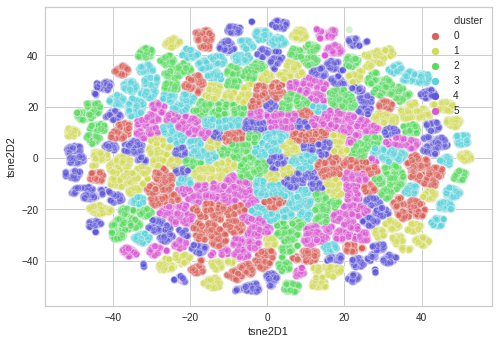

In [101]:
sns.scatterplot(data=df_ml3Sample,x='tsne2D1',y='tsne2D2',hue='cluster',alpha=0.3,palette=sns.color_palette('hls',6))

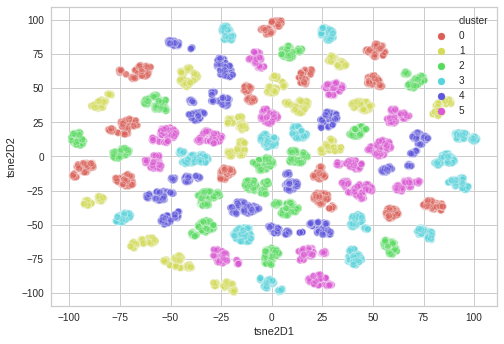

In [87]:
sns.scatterplot(data=df_ml3Sample,x='tsne2D1',y='tsne2D2',hue='cluster',alpha=0.3,palette=sns.color_palette('hls',6))


In [ ]:
#Gamma regression
#data = X_train

#data.exog = sm.add_constant(data.exog)

# Instantiate a gamma family model with the default link function.
#gamma_model = sm.GLM(y_train,X_train, family=sm.families.Gamma(link=log))

#gamma_results = gamma_model.fit()

#print(gamma_results.summary())


DecisionTreeClassifier(max_iter=1e6)'

In [ ]:
## LIN REG

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
R2=r2_score(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)

In [ ]:
R2,MSE,MAE

(-0.8482326413853558, 796379.672283193, 417.4039594296992)

In [ ]:
## LIN REG1

In [ ]:
linreg1 = LinearRegression()
linreg1.fit(X1_train,y1_train)
y_pred1=linreg1.predict(X1_test)
R21=r2_score(y1_test,y_pred1)
MSE1=mean_squared_error(y1_test,y_pred1)
MAE1=mean_absolute_error(y1_test,y_pred1)

In [ ]:
R21,MSE1,MAE1

(0.45520524157879594, 234745.053981881, 294.2181539865349)

In [ ]:
twedreg = TweedieRegressor(power=1, alpha=0.5, link='log',max_iter=100000)
twedreg.fit(X_train,y_train)
y_pred=twedreg.predict(X_test)
R2twed=r2_score(y_test,y_pred)
MSEtwed=mean_squared_error(y_test,y_pred)
MAEtwed=mean_absolute_error(y_test,y_pred)

KeyboardInterrupt: 

# Lanceur de models
model_list=["TweedieRegressor(power=1, alpha=0.5, link='log',max_iter=100000000)",'LinearRegression()']

#Ecrire ne classe abvec les modeles
def LaunchAllModels(model_list):
    results=[]
    for i in model_list:
        model=eval(f'{i}')
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        R2=r2_score(y_test,y_pred)
        MSE=mean_squared_error
        MAE=mean_absolute_error
        results.append([i,R2,MSE,MAE])
    return results
result=LaunchAllModels(model_list) 




In [ ]:
#'GaussianNB()','RandomForestClassifier()',

In [ ]:
result=pd.DataFrame(result)
result.columns=['Model Name','R^2']
result.round(3)

In [ ]:
#model_list=['LogisticRegression(max_iter=1e8)','GaussianNB()','DecisionTreeClassifier()','RandomForestClassifier()','RandomForestClassifier(max_depth=3)',"RandomForestClassifier(class_weight='balanced')",'SVC()',"SVC(kernel='sigmoid')",'NuSVC(nu=0.1)',"NuSVC(nu=0.1,kernel='sigmoid')",'KNeighborsClassifier(n_neighbors=7)','KNeighborsClassifier(n_neighbors=3)',"KNeighborsClassifier(weights='distance')",'AdaBoostClassifier()','CatBoostClassifier()']




In [ ]:
### Hyper parameter Tuning and cross validation

In [ ]:
#kfold=KFold(5, True, 42)
# create 5 sets 4 train 1 test

In [ ]:
#params={'n_neighbors':range(3,10,2), #4
#'weights':['uniform','distance'], #2
#'leaf_size':[30,45], #2
#'p':[2,3]} #2


#model=GammaRegressor()

#cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=42)

#grid_search=GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, scoring='recall', cv=cv)

#Normalisation données apres avoir intégré la classe
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax=min_max_scaler.fit_transform(X_test)
